<a href="https://colab.research.google.com/github/ChengCheLeeJimmy/Python-Taiwan-Stock-Exchange-twse-Web-Scraping/blob/main/Python_%E7%88%AC%E5%8F%96%E5%8F%B0%E7%81%A3%E8%AD%89%E5%88%B8%E4%BA%A4%E6%98%93%E6%89%80%E7%9A%84%E5%80%8B%E8%82%A1%E6%97%A5%E6%88%90%E4%BA%A4%E8%B3%87%E8%A8%8A(%E4%BB%A5%E5%8F%B0%E7%A9%8D%E9%9B%BB%E7%82%BA%E4%BE%8B%EF%BC%8C%E6%94%BE_Github).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

爬蟲
去到台灣證券交易所的網站，然後去交易資訊->盤後資訊->個股日成交資訊(以 112/05 台積電 2330 為例)

In [7]:
import requests
import json, csv
import pandas as pd
import os
import matplotlib.pyplot as plt

# plt.rcParams["font.sans-serif"] = ['Microsoft JhengHei'] # 設定中文字型
# plt.rcParams["axes.unicode_minus"] = False

filepath = 'stock.csv'

if not os.path.isfile(filepath): # 如果檔案不存在就建立檔案
    url_twse = 'https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20230501&stockNo=2330&response=json&_=1687406965480'
    response = requests.get(url_twse)
    json_data = json.loads(response.text)

    output_file = open(filepath, 'w', encoding='utf-8')
    output_writer = csv.writer(output_file)
    output_writer.writerow(json_data['fields'])
    for dataline in (json_data['data']):
        output_writer.writerow(dataline)
    output_file.close()


In [8]:
def convertDate(date): # 寫一個函數來轉換民國年和西元年
  string = str(date)
  year_string = string[:3] # 取出日期欄位當中前三個字是民國年
  year = str(int(year_string) + 1911) # 轉成西元年
  date = year + "/" + string[4:6] + "/" + string[7:9] # 組合日期
  return date

<ipython-input-9-7bda65359b0f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_stock['日期'][i] = convertDate(pd_stock['日期'][i])


<Axes: xlabel='日期'>

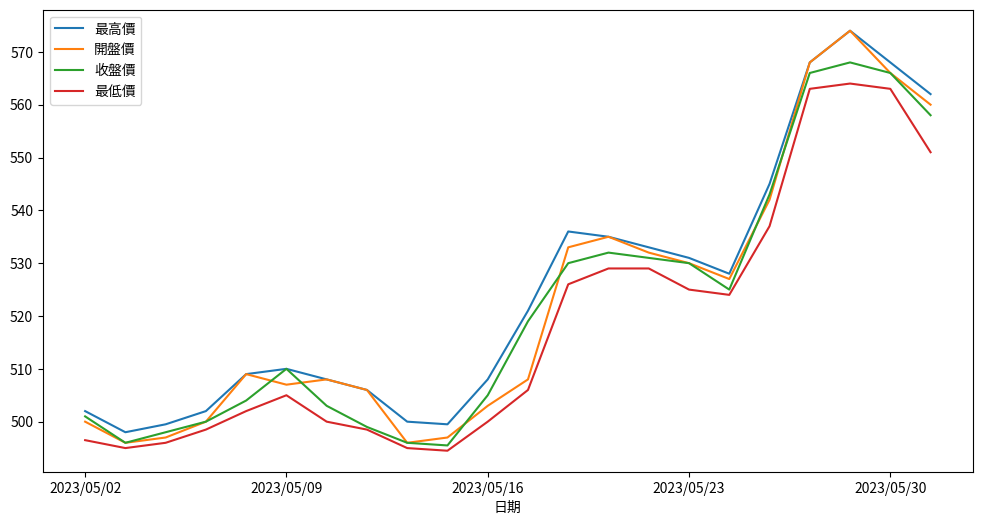

In [9]:
pd_stock = pd.read_csv(filepath, encoding='utf-8')

for i in range(len(pd_stock['日期'])): # 轉換民國日期格式為西元年格式
  pd_stock['日期'][i] = convertDate(pd_stock['日期'][i])

pd_stock.plot(kind = 'line', figsize = (12, 6), x='日期', y=['最高價', '開盤價', '收盤價', '最低價'])

下面是抓取整年份(2022/111年)的資料

In [ ]:
def twodigit(n):
  if n < 10:
    string = '0' + str(n)
  else:
    string = str(n)
  return string

In [ ]:
filepath1 = 'stock_year.csv'

urlhead = 'https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=2022'
urltail = '01&stockNo=2330&response=json&_=1687406965480'

if not os.path.isfile(filepath1): # 如果檔案不存在就建立檔案
    for i in range(1, 13):
        url_twse = urlhead + twodigit(i) + urltail
        response = requests.get(url_twse)
        json_data = json.loads(response.text)

        output_file = open(filepath1, 'a', encoding='utf-8')
        output_writer = csv.writer(output_file)

        if i==1 : # 標頭欄位只要一個就好
            output_writer.writerow(json_data['fields'])
        for dataline in (json_data['data']):
            output_writer.writerow(dataline)
        output_file.close()


<ipython-input-18-06a7ee1ed6b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_stock['日期'][i] = convertDate(pd_stock['日期'][i]) # 原本教學裡的方法，二選一。


<Axes: xlabel='日期'>

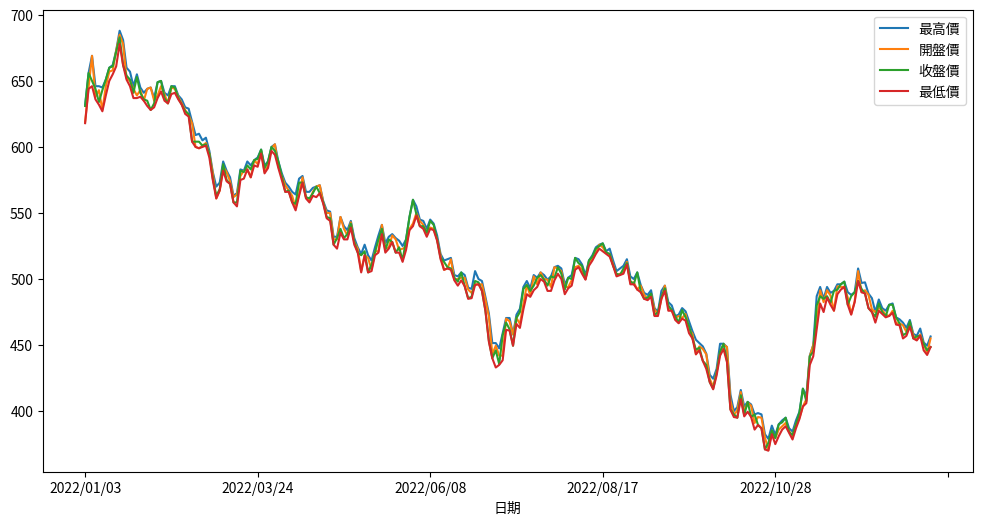

In [ ]:
pd_stock = pd.read_csv(filepath1, encoding='utf-8')

for i in range(len(pd_stock['日期'])): # 轉換民國日期格式為西元年格式
  pd_stock['日期'][i] = convertDate(pd_stock['日期'][i])

pd_stock.plot(kind = 'line', figsize = (12, 6), x='日期', y=['最高價', '開盤價', '收盤價', '最低價'])